In [134]:
import tensorflow as tf
from src.dataset import mfccs_dataset, stft_dataset, NUHI_PATH, balance_dataset, show_dataset_balance
from src.plots import plot_history

train_mfccs_ds, val_mfccs_ds, label_names, mfccs_input_shape = mfccs_dataset(NUHI_PATH, 0.7, 4, True, 2)
train_stft_ds, val_stft_ds, label_names, stft_input_shape = stft_dataset(NUHI_PATH, 0.7, 4, True, 2)

print("BALANCE EVAL")
val_stft_ds = balance_dataset(val_stft_ds)
show_dataset_balance(val_stft_ds)
val_mfccs_ds = balance_dataset(val_mfccs_ds)
show_dataset_balance(val_mfccs_ds)

Found 130 files belonging to 2 classes.
Using 39 files for training.
Using 91 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (4, 4000)
Example label shape: (4,)
513 44100 16
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100 16
Label: queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)

===== MFCCs (num_spectrogram_bins, sample_rate, num_mfccs) ====
513 44100 12
513 44100 12

Before balancing
Queen: 41% (16), Noqueen: 59% (23)

After balancing
Queen: 50% (16), Noqueen: 50% (16)

 ==== MFCCs input shape ==== 
(12, 12, 1)
Found 130 files belonging to 2 classes.
Using 39 files for training.
Using 91 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.i

In [135]:
trained_osbh_mfcc_conv_mini = tf.keras.models.load_model("models/osbh_mfcc_conv.keras")
trained_osbh_stft_conv = tf.keras.models.load_model("models/osbh_stft_conv.keras")

In [136]:
results = trained_osbh_mfcc_conv_mini.evaluate(val_mfccs_ds)
print(f"Evaluated MFCC Conv: {results}")

results = trained_osbh_stft_conv.evaluate(val_stft_ds)
print(f"Evaluated STFT Conv: {results}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1162 - loss: 2.1652
Evaluated MFCC Conv: [2.06327223777771, 0.12903225421905518]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4979 - loss: 2.2074
Evaluated STFT Conv: [2.211930751800537, 0.5]


# Transfer STFT

Epoch 1/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5625 - loss: 2.3551 - val_accuracy: 0.4839 - val_loss: 1.3932
Epoch 2/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5208 - loss: 1.2350 - val_accuracy: 0.5806 - val_loss: 0.5579
Epoch 3/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6458 - loss: 0.5282 - val_accuracy: 0.5161 - val_loss: 0.5269
Epoch 4/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5000 - loss: 0.5193 - val_accuracy: 0.5000 - val_loss: 0.5886
Epoch 5/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4583 - loss: 0.7250 - val_accuracy: 0.5484 - val_loss: 0.6380
Epoch 6/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7292 - loss: 0.6137 - val_accuracy: 0.6774 - val_loss: 0.6350
Epoch 7/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6667 - loss: 0.8746 - val_accuracy: 0.7097 - val_loss: 0.5883
Epoch 8/45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7500 - loss: 0.6768 - val_accuracy: 0.7097 - val_loss: 0.528

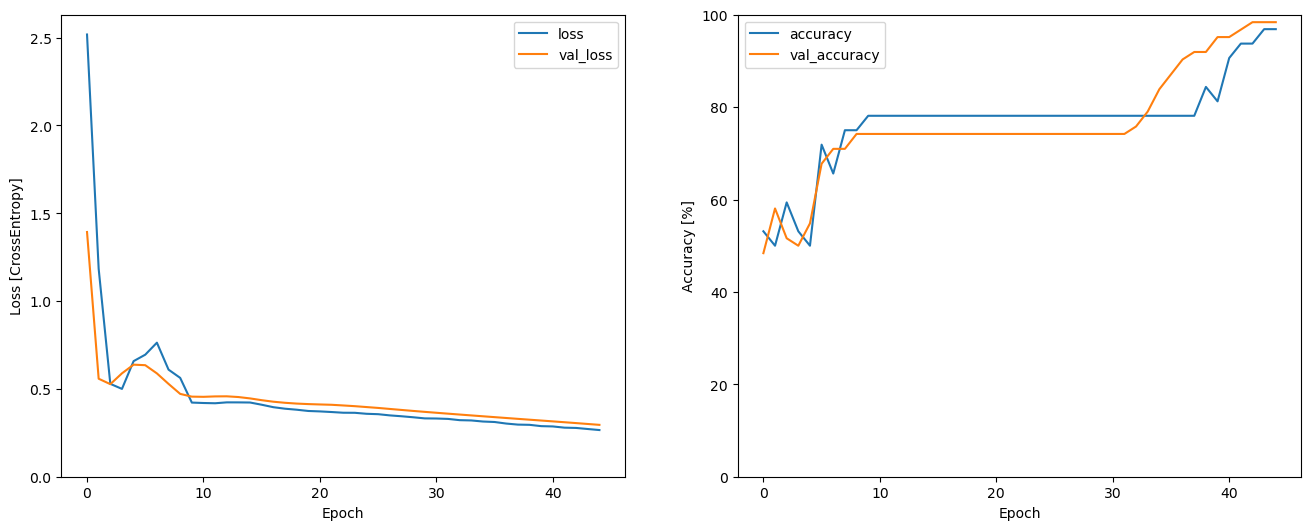

In [137]:
history_trained_osbh_stft_conv = trained_osbh_stft_conv.fit(
    train_stft_ds, 
    validation_data=val_stft_ds, 
    epochs=45,
)

plot_history(history_trained_osbh_stft_conv)

# Transfer MFCC

Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2500 - loss: 1.7291 - val_accuracy: 0.1452 - val_loss: 1.9985
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2500 - loss: 1.7751 - val_accuracy: 0.1774 - val_loss: 1.8684
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1875 - loss: 1.5137 - val_accuracy: 0.2097 - val_loss: 1.7035
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2917 - loss: 1.2822 - val_accuracy: 0.2419 - val_loss: 1.5330
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2917 - loss: 1.2370 - val_accuracy: 0.2742 - val_loss: 1.3702
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5208 - loss: 1.0103 - val_accuracy: 0.3226 - val_loss: 1.2332
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5417 - loss: 0.8404 - val_accuracy: 0.3871 - val_loss: 1.1244
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5208 - loss: 0.8772 - val_accuracy: 0.4355 - val_loss: 1.0368


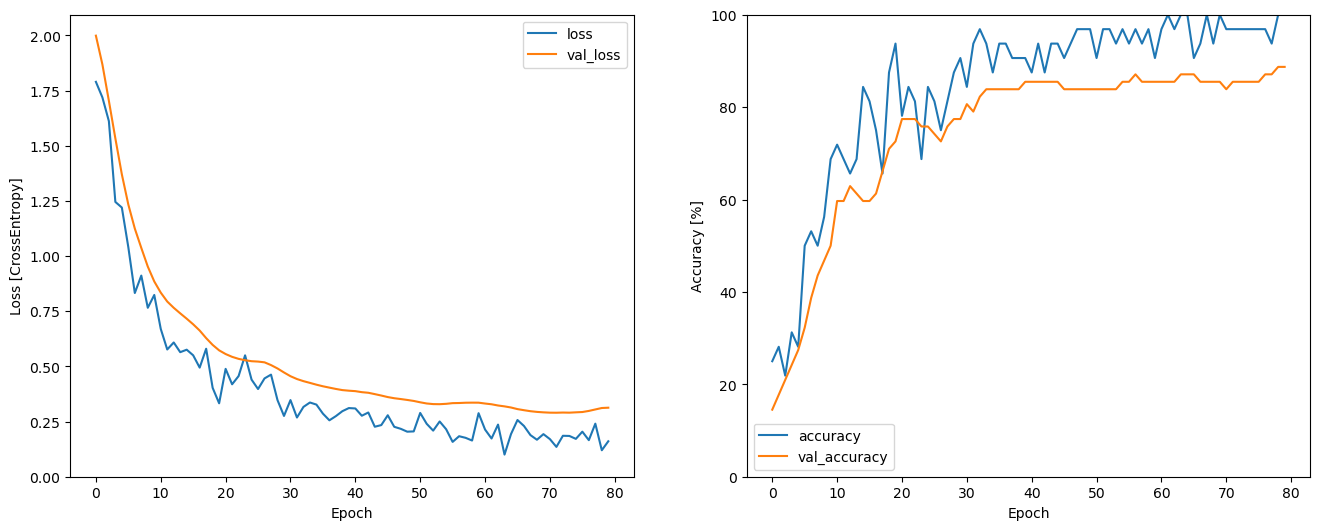

In [138]:
history_trained_history_mfcc_conv_mini = trained_osbh_mfcc_conv_mini.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=80,
)

plot_history(history_trained_history_mfcc_conv_mini)

In [139]:
trained_osbh_mfcc_conv_mini.save('models/trans_mfcc_conv_mini.keras')
trained_osbh_stft_conv.save('models/trans_stft_conv.keras')
def history_to_summary(prefix: str, history):
    print(f"{prefix}:    Loss: {history.history['loss'][-1]:.2f}, VLoss: {history.history['val_loss'][-1]:.2f}, Acc: {history.history['accuracy'][-1]:.2f},  VAcc: {history.history['val_accuracy'][-1]:.2f}" )

history_to_summary("Tr. MFCCs + Conv Mini      ", history_trained_history_mfcc_conv_mini)
history_to_summary("Tr. STFT + Conv      ", history_trained_osbh_stft_conv)

Tr. MFCCs + Conv Mini      :    Loss: 0.16, VLoss: 0.31, Acc: 1.00,  VAcc: 0.89
Tr. STFT + Conv      :    Loss: 0.27, VLoss: 0.30, Acc: 0.97,  VAcc: 0.98
